# Assignment 2: Project C — Making a Neural Network

1. What processing was required on this pre-processed dataset (D3.csv) to further improve the data quality for neural network modelling? What distribution split between training and test datasets have you used?
2. Build a Neural Network model using the default setting. Answer the following:
- Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.
- What is the classification accuracy on training and test datasets?
- Did the training process converge and result in the best model?
3. Refine this network by tuning it with GridSearchCV. Report the trained model.
- Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.
- What is the classification accuracy on training and test datasets?
- Did the training process converge and result in the best model?
- Do you see any sign of over-fitting?
4. Let us see if feature selection helps in improving the model? Build another Neural Network model with reduced features set. Perform dimensionality reduction by selecting variables with a decision tree (use the best decision tree model that you have built in the previous modelling task). Tune the model with GridSearchCV to find the best parameters setting. Answer the following:\
- Did feature selection favour the outcome? Any change in network architecture? What inputs are being used as the network input?
- What is the classification accuracy on training and test datasets?
- How many iterations are now needed to train this network?
- Do you see any sign of over-fitting? Did the training process converge and result in the best model?


**1. What processing was required on this pre-processed dataset (D3.csv) to further improve the data quality for neural network modelling? What distribution split between training and test datasets have you used?**

In [6]:
# insert this code in a file dm_tools.py so that you don't have to write this everytime you build a new model.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('D3.csv')
    
# Drop variables
df = df.drop(['Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm', 'Year'], axis=1)
    
# Change Pressure and Temp variables to averages
df['Pressure'] = (df['Pressure9am'] + df['Pressure3pm'])/2
df = df.drop(['Pressure9am', 'Pressure3pm'], axis=1)
df['Temp'] = (df['MinTemp'] + df['MaxTemp'])/2
df = df.drop(['MinTemp', 'MaxTemp'], axis=1)
              
# Use one-hot encoding for categorical variables
df = pd.get_dummies(df)
print(df.info())

# target/input split
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'], axis=1)

# setting random state
rs = 10

X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Columns: 109 entries, Month to WindDir3pm_WSW
dtypes: float64(7), int64(5), uint8(97)
memory usage: 26.2 MB
None


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialise a StandardScaler object
scaler = StandardScaler()

# Visualize min, max, mean, and standard deviation of data before scaling
print("Before scaling\n-------------")
for i in range(10):
    col = X_train[:, i]
    # Display statistics for each variable (column) in X_train
    print("Variable #{}: min {}, max {}, mean {:.2f}, and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# Learn the mean and std.dev of variables from the training data
# Then use the learned values to transform the training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(10):
    col = X_train[:, i]
    # Display statistics for each variable after scaling
    print("Variable #{}: min {}, max {}, mean {:.2f}, and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# Use the statistics learned from training to transform the test data
# NEVER learn from test data; this is supposed to be a set of data
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min -1.5743209315248312, max 1.631729774781424, mean -0.00, and std dev 1.00
Variable #1: min -0.27615087806300226, max 42.92717183441524, mean -0.00, and std dev 1.00
Variable #2: min -1.7283141576961072, max 43.98261239301211, mean -0.00, and std dev 1.00
Variable #3: min -2.7777448831061067, max 2.517232055162849, mean 0.00, and std dev 1.00
Variable #4: min -2.51164382853385, max 7.223836994226553, mean 0.00, and std dev 1.00
Variable #5: min -1.5790534287448341, max 13.065544355166038, mean 0.00, and std dev 1.00
Variable #6: min -2.1384165687894057, max 7.373445388561311, mean 0.00, and std dev 1.00
Variable #7: min -3.64623366041603, max 1.6505920144068724, mean 0.00, and std dev 1.00
Variable #8: min -2.511284995504647, max 2.36595082455025, mean -0.00, and std dev 1.00
Variable #9: min -5.319356076479082, max 3.5480898594610255, mean 0.00, and std dev 1.00
After scaling
-------------
Variable #0: min -1.5743209315248508, max 1.63172977

**2. Build a Neural Network model using the default setting.**

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'rs' is a predefined random state variable
# Create an instance of MLPClassifier with a specified maximum number of iterations
# (max_iter) and a random state
model_1 = MLPClassifier(random_state=rs)

# Train the model using the training data (X_train, y_train)
model_1.fit(X_train, y_train)

# Print the accuracy of the model on the training data
print("Train accuracy:", model_1.score(X_train, y_train))

# Print the accuracy of the model on the testing data (unseen data)
print("Test accuracy:", model_1.score(X_test, y_test))

# Make predictions on the testing data
y_pred = model_1.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print information about the trained model, which typically includes
# hyperparameters and other details about the neural network
print(model_1)

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train accuracy: 0.9023434753347463
Test accuracy: 0.8394506164158815
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     33101
           1       0.66      0.58      0.62      9565

    accuracy                           0.84     42666
   macro avg       0.77      0.75      0.76     42666
weighted avg       0.83      0.84      0.84     42666

MLPClassifier(random_state=10)


**2(a) Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.**

In [13]:
# Access all parameters of the trained model
model_1_params = model_1.get_params()

# Print the parameters
print(model_1_params)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [15]:
# Access the number of neurons in the input layer
num_neurons_input_layer = model_1.n_features_in_

# Print the number of neurons in the input layer
print("Number of neurons in the input layer:", num_neurons_input_layer)

Number of neurons in the input layer: 108


In [ ]:
hidden_layer_sizes=(100,),  # Tuple representing the size of hidden layers
    activation='relu',          # Activation function for hidden layers
    solver='adam',              # Optimization algorithm
    alpha=0.0001,                # L2 penalty (regularization term) parameter
    batch_size='auto',           # Size of minibatches for optimization
    learning_rate='constant',    # Learning rate schedule
    learning_rate_init=0.001,    # Initial learning rate
    max_iter=200,                # Maximum number of iterations
    shuffle=True,                # Whether to shuffle the training data before each epoch
    random_state=None,           # Seed for random number generation
    tol=1e-4,                    # Tolerance for optimization
    verbose=False,               # Whether to print progress messages to stdout
    warm_start=False,            # If set to True, reuse the solution of the previous call to fit
    momentum=0.9,                # Momentum for gradient descent
    nesterovs_momentum=True,     # Whether to use Nesterov's momentum
    early_stopping=False,        # Whether to use early stopping to terminate training when validation score is not improving
    validation_fraction=0.1,     # Fraction of training data to set aside as validation set for early stopping
    beta_1=0.9,                  # Exponential decay rate for estimates of first moment vector in adam
    beta_2=0.999,                # Exponential decay rate for estimates of second moment vector in adam
    epsilon=1e-8,                # Value for numerical stability in adam
    n_iter_no_change=10,         # Maximum number of epochs with no improvement to wait before early stopping
    max_fun=15000                # Maximum number of function evaluations during optimization

Number of neurons in the input layer: 108
Number of hidden layers: 100
Activation function for hidden layers: rulu
Alpha: 0.0001
Number of Iterations: 200
Random State: 10



**What is the classification accuracy on training and test datasets?**

In [17]:
# Print the accuracy of the model on the training data
print("Train accuracy:", model_1.score(X_train, y_train))

# Print the accuracy of the model on the testing data (unseen data)
print("Test accuracy:", model_1.score(X_test, y_test))

# Make predictions on the testing data
y_pred = model_1.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

Train accuracy: 0.9023434753347463
Test accuracy: 0.8394506164158815
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     33101
           1       0.66      0.58      0.62      9565

    accuracy                           0.84     42666
   macro avg       0.77      0.75      0.76     42666
weighted avg       0.83      0.84      0.84     42666



**Did the training process converge and result in the best model?**

The Maximum iterations (200) was reached and the optimization had not converged yet. We can run the model again adjusting the max number of iteration

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'rs' is a predefined random state variable
# Create an instance of MLPClassifier with a specified maximum number of iterations
# (max_iter) and a random state
model_2 = MLPClassifier(max_iter=700, random_state=rs)

# Train the model using the training data (X_train, y_train)
model_2.fit(X_train, y_train)

# Print the accuracy of the model on the training data
print("Train accuracy:", model_2.score(X_train, y_train))

# Print the accuracy of the model on the testing data (unseen data)
print("Test accuracy:", model_2.score(X_test, y_test))

# Make predictions on the testing data
y_pred = model_2.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print information about the trained model, which typically includes
# hyperparameters and other details about the neural network
print(model_2)

Train accuracy: 0.90437254527739
Test accuracy: 0.8381615337739652
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     33101
           1       0.66      0.59      0.62      9565

    accuracy                           0.84     42666
   macro avg       0.77      0.75      0.76     42666
weighted avg       0.83      0.84      0.83     42666

MLPClassifier(max_iter=700, random_state=10)


**3. Refine this network by tuning it with GridSearchCV. Report the trained model.**

In [18]:
# Print the shape of the training data matrix X_train
print(X_train.shape)

(99553, 108)


With 109 features, we will start tuning with one hidden layer of 9 to 109 neurons, increment of 20

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define a dictionary of hyperparameter values to search through.
# In this case, it's the hidden layer sizes, where each value is a tuple
# containing a single integer representing the size of a hidden layer.
params = {'hidden_layer_sizes': [(x,) for x in range(9, 110, 20)]}

# Create an instance of GridSearchCV, which performs a search over a specified
# parameter grid for the best hyperparameters.
# 'estimator' is the model to be tuned, and 'param_grid' is the dictionary
# of hyperparameter values to search through.
# 'cv' is the number of cross-validation folds, and 'n_jobs' is the number
# of CPU cores to use in parallel (set to -1 to use all available cores).
cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), return_train_score=True, cv=10, n_jobs=-1)

# Fit the GridSearchCV instance on the training data to find the best hyperparameters.
cv_1.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(9,), (29,), (49,), (69,),
                                                (89,), (109,)]},
             return_train_score=True)

In [21]:
# Access the results of the cross-validated hyperparameter search
result_set = cv_1.cv_results_

# Print the result set, which is a dictionary containing various information
# about the cross-validated search, including mean and standard deviation
# scores for each combination of hyperparameters, training time, etc.
print(result_set)


{'mean_fit_time': array([ 34.06599164,  87.07128804, 154.49099796, 230.78428283,
       280.09072275, 272.26050303]), 'std_fit_time': array([ 3.65194392,  9.33280726, 15.98802998,  7.83238444, 16.09338113,
       49.22682128]), 'mean_score_time': array([0.01370883, 0.03326173, 0.05552626, 0.07143404, 0.0757318 ,
       0.0359077 ]), 'std_score_time': array([0.004834  , 0.00580087, 0.0129982 , 0.01224278, 0.0053626 ,
       0.01725672]), 'param_hidden_layer_sizes': masked_array(data=[(9,), (29,), (49,), (69,), (89,), (109,)],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (9,)}, {'hidden_layer_sizes': (29,)}, {'hidden_layer_sizes': (49,)}, {'hidden_layer_sizes': (69,)}, {'hidden_layer_sizes': (89,)}, {'hidden_layer_sizes': (109,)}], 'split0_test_score': array([0.85526316, 0.85566493, 0.84943753, 0.84401366, 0.8359783 ,
       0.83175974]), 'split1_test_score': array([0.85958216, 0.85817597

Total number of models:  6


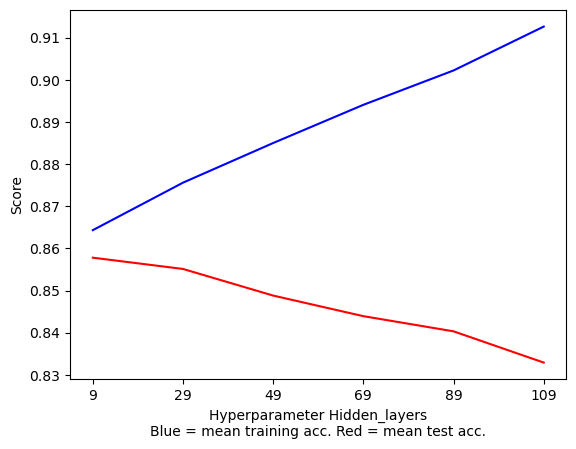

In [23]:
# Access the mean training accuracy scores from the cross-validated search results
train_result = result_set['mean_train_score']

# Access the mean test accuracy scores from the cross-validated search results
test_result = result_set['mean_test_score']

# Print the total number of models (number of hyperparameter combinations)
print("Total number of models: ", len(test_result))

import matplotlib.pyplot as plt

# Plot hidden layers hyperparameter values vs mean training and test accuracy scores
plt.plot(range(0, len(train_result)), train_result, 'b', range(0, len(test_result)), test_result, 'r')
# Label the x-axis with the hyperparameter values
plt.xticks(range(0, len(train_result)), range(9, 110, 20))
plt.xlabel('Hyperparameter Hidden_layers\nBlue = mean training acc. Red = mean test acc.')
plt.ylabel('Score')

# Display the plot
plt.show()


In [24]:
# Print the accuracy of the best model on the training data
print("Train accuracy:", cv_1.score(X_train, y_train))

# Print the accuracy of the best model on the testing data
print("Test accuracy:", cv_1.score(X_test, y_test))

# Make predictions on the testing data using the best model
y_pred = cv_1.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found during the hyperparameter search
print(cv_1.best_params_)

Train accuracy: 0.863560113708276
Test accuracy: 0.857872779262176
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33101
           1       0.74      0.57      0.64      9565

    accuracy                           0.86     42666
   macro avg       0.81      0.76      0.78     42666
weighted avg       0.85      0.86      0.85     42666

{'hidden_layer_sizes': (9,)}


The output of this GridSearchCV returns 9 neurons as the optimal number of neurons in the hidden layer. We should attempt to tune the model with the lower number of neurons in the hidden layer.

In [25]:
# Define a dictionary of new hyperparameter values to search through.
# In this case, it's different combinations of hidden layer sizes.
params = {'hidden_layer_sizes': [(3,), (6,),(9,), (12,), (15,), (18,), (21,), (24,)]}

# Create a new instance of GridSearchCV, which performs a search over
# the specified parameter grid for the best hyperparameters.
# 'estimator' is the model to be tuned, and 'param_grid' is the dictionary
# of hyperparameter values to search through.
# 'cv' is the number of cross-validation folds, and 'n_jobs' is the number
# of CPU cores to use in parallel (set to -1 to use all available cores).
cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)

# Fit the GridSearchCV instance on the training data to find the best hyperparameters.
cv_2.fit(X_train, y_train)

# Print the accuracy of the best model on the training data
print("Train accuracy:", cv_2.score(X_train, y_train))

# Print the accuracy of the best model on the testing data
print("Test accuracy:", cv_2.score(X_test, y_test))

# Make predictions on the testing data using the best model
y_pred = cv_2.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found during the hyperparameter search
print(cv_2.best_params_)


Train accuracy: 0.863560113708276
Test accuracy: 0.857872779262176
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33101
           1       0.74      0.57      0.64      9565

    accuracy                           0.86     42666
   macro avg       0.81      0.76      0.78     42666
weighted avg       0.85      0.86      0.85     42666

{'hidden_layer_sizes': (9,)}


We now have the optimal value for neuron count in the hidden layer. Next, we will tune the second hyperparameter, alpha, which is the learning rate for the gradient descent algorithm.

In [26]:
# Define a dictionary of hyperparameter values to search through.
# In this case, it includes different combinations of hidden layer sizes
# and values for the regularization parameter alpha.
params = {'hidden_layer_sizes': [(5,), (7,), (9,), (11,), (13,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}

# Create a new instance of GridSearchCV, which performs a search over
# the specified parameter grid for the best hyperparameters.
# 'estimator' is the model to be tuned, and 'param_grid' is the dictionary
# of hyperparameter values to search through.
# 'cv' is the number of cross-validation folds, and 'n_jobs' is the number
# of CPU cores to use in parallel (set to -1 to use all available cores).
cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)

# Fit the GridSearchCV instance on the training data to find the best hyperparameters.
cv_3.fit(X_train, y_train)

# Print the accuracy of the best model on the training data
print("Train accuracy:", cv_3.score(X_train, y_train))

# Print the accuracy of the best model on the testing data
print("Test accuracy:", cv_3.score(X_test, y_test))

# Make predictions on the testing data using the best model
y_pred = cv_3.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

# Print the best hyperparameters found during the hyperparameter search
print(cv_3.best_params_)

Train accuracy: 0.863560113708276
Test accuracy: 0.857872779262176
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33101
           1       0.74      0.57      0.64      9565

    accuracy                           0.86     42666
   macro avg       0.81      0.76      0.78     42666
weighted avg       0.85      0.86      0.85     42666

{'alpha': 0.0001, 'hidden_layer_sizes': (9,)}


**3(a) Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.**

In [27]:
# Access all parameters of the trained model
cv_3_params = cv_3.get_params()

# Print the parameters
print(cv_3_params)

{'cv': 10, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': 10, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(random_state=10), 'n_jobs': -1, 'param_grid': {'hidden_layer_sizes': [(5,), (7,), (9,), (11,), (13,)], 'alpha': [0.01, 0.001, 0.0001, 1e-05]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 

In [28]:
# Access the number of neurons in the input layer
num_neurons_input_layer = cv_3.n_features_in_

# Print the number of neurons in the input layer
print("Number of neurons in the input layer:", num_neurons_input_layer)

Number of neurons in the input layer: 108


In [39]:
# Access the best model
best_model = cv_3.best_estimator_

# Access the number of iterations used by the best model
num_iterations_best_model = best_model.n_iter_

# Print the number of iterations
print("Number of iterations for the best model:", num_iterations_best_model)

Number of iterations for the best model: 76


In [ ]:
Number of neurons in the input layer: 108
Number of hidden layers: 9
Activation function for hidden layers: rulu
alpha: 0.0001
Number of Iterations: 76
Random State: 10

**3(b) What is the classification accuracy on training and test datasets?**

In [30]:
# Print the accuracy of the best model on the training data
print("Train accuracy:", cv_3.score(X_train, y_train))

# Print the accuracy of the best model on the testing data
print("Test accuracy:", cv_3.score(X_test, y_test))

# Make predictions on the testing data using the best model
y_pred = cv_3.predict(X_test)

# Print a classification report that includes precision, recall, and F1-score
# for each class in the testing data
print(classification_report(y_test, y_pred))

Train accuracy: 0.863560113708276
Test accuracy: 0.857872779262176
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33101
           1       0.74      0.57      0.64      9565

    accuracy                           0.86     42666
   macro avg       0.81      0.76      0.78     42666
weighted avg       0.85      0.86      0.85     42666



**3(c) Did the training process converge and result in the best model?**

In [ ]:
Yes it did

**3(d) Do you see any sign of over-fitting?**

**4. Let us see if feature selection helps in improving the model? Build another Neural Network model with reduced features set. Perform dimensionality reduction by selecting variables with a decision tree (use the best decision tree model that you have built in the previous modelling task). Tune the model with GridSearchCV to find the best parameters setting.** 

In [32]:
# Perform dimension reduction using decision tree

import pickle
with open('Assign2_DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5}


C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator GridSearchCV from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [33]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, X.columns)

Humidity3pm : 0.6210886371783307
Rainfall : 0.1013670287873209
WindGustSpeed : 0.07786988178691295
Pressure : 0.06931905985641469
Sunshine : 0.06489778479388851
Temp : 0.017297934703712024
Humidity9am : 0.010426928406427534
WindSpeed3pm : 0.005571413233730641
Location_MountGinini : 0.0036902773321136743
WindSpeed9am : 0.002731845904030169
Evaporation : 0.0024920007843218643
WindDir3pm_NNW : 0.002172839329360932
Location_Albany : 0.002149410626922742
Location_Wollongong : 0.0020068298629072273
WindDir3pm_N : 0.0016369502393569556
WindGustDir_NE : 0.0015878863415322696
Location_Brisbane : 0.0015085686366425846
WindDir9am_NNE : 0.001215868033739137
Location_NorahHead : 0.0011290139783953137
Location_Dartmoor : 0.0010830494231520303


In [34]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(99553, 7)


In [35]:
params = {'hidden_layer_sizes': [(5,), (7,), (9,), (11,), (13,)], 'alpha': [0.01, 0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.8452181250188342
Test accuracy: 0.8457319645619463
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     33101
           1       0.74      0.49      0.59      9565

    accuracy                           0.85     42666
   macro avg       0.80      0.72      0.75     42666
weighted avg       0.84      0.85      0.83     42666

{'alpha': 0.001, 'hidden_layer_sizes': (13,)}


In [36]:
cv_sel_model.best_estimator_.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(13,), random_state=10)

**4(a) Did feature selection favour the outcome? Any change in network architecture? What inputs are being used as the network input?**

No, as training accruacy decreased

In [40]:
# Access all parameters of the trained model
cv_sel_model_params = cv_sel_model.get_params()

# Print the parameters
print(cv_sel_model_params)

{'cv': 10, 'error_score': nan, 'estimator__activation': 'relu', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': (100,), 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': 10, 'estimator__shuffle': True, 'estimator__solver': 'adam', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(random_state=10), 'n_jobs': -1, 'param_grid': {'hidden_layer_sizes': [(5,), (7,), (9,), (11,), (13,)], 'alpha': [0.01, 0.001, 0.0001, 1e-05]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 

In [41]:
# Access the number of neurons in the input layer
num_neurons_input_layer = cv_sel_model.n_features_in_

# Print the number of neurons in the input layer
print("Number of neurons in the input layer:", num_neurons_input_layer)

Number of neurons in the input layer: 108


Number of neurons in the input layer: 108 
**Number of hidden layers: 13** 
Activation function for hidden layers: relu 
**alpha: 0.001** 
**Number of Iterations: 106** 
Random State: 10

In [37]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, X.columns)

Humidity3pm : 0.6210886371783307
Rainfall : 0.1013670287873209
WindGustSpeed : 0.07786988178691295
Pressure : 0.06931905985641469
Sunshine : 0.06489778479388851
Temp : 0.017297934703712024
Humidity9am : 0.010426928406427534
WindSpeed3pm : 0.005571413233730641
Location_MountGinini : 0.0036902773321136743
WindSpeed9am : 0.002731845904030169
Evaporation : 0.0024920007843218643
WindDir3pm_NNW : 0.002172839329360932
Location_Albany : 0.002149410626922742
Location_Wollongong : 0.0020068298629072273
WindDir3pm_N : 0.0016369502393569556
WindGustDir_NE : 0.0015878863415322696
Location_Brisbane : 0.0015085686366425846
WindDir9am_NNE : 0.001215868033739137
Location_NorahHead : 0.0011290139783953137
Location_Dartmoor : 0.0010830494231520303


**4(b) What is the classification accuracy on training and test datasets?**

**4(c) How many iterations are now needed to train this network?**


In [42]:
# Number of iterations needed to train this netwrok

print(cv_sel_model.best_estimator_.n_iter_)

106


**4(d) Do you see any sign of over-fitting? Did the training process converge and result in the best model?**

No overfitting because training and testing accuray are almost the same. 